**<center><font size = "6">Hyperparameters Multinominal Naive Bayes<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parámetros-por-defecto" data-toc-modified-id="Parámetros-por-defecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parámetros por defecto</a></span></li><li><span><a href="#Alpha-=-0.5" data-toc-modified-id="Alpha-=-0.5-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Alpha = 0.5</a></span></li><li><span><a href="#Alpha-=-0.0" data-toc-modified-id="Alpha-=-0.0-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Alpha = 0.0</a></span></li><li><span><a href="#Alpha-=-1.0,-fit_prior=False" data-toc-modified-id="Alpha-=-1.0,-fit_prior=False-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Alpha = 1.0, fit_prior=False</a></span></li><li><span><a href="#Alpha-=-0.5,-fit_prior=False" data-toc-modified-id="Alpha-=-0.5,-fit_prior=False-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Alpha = 0.5, fit_prior=False</a></span></li><li><span><a href="#Alpha-=-1.0,-fit_prior=True,-class_prior=[0.2,-0.96,-0.2]" data-toc-modified-id="Alpha-=-1.0,-fit_prior=True,-class_prior=[0.2,-0.96,-0.2]-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Alpha = 1.0, fit_prior=True, class_prior=[0.2, 0.96, 0.2]</a></span></li><li><span><a href="#Alpha-=-0.5,-fit_prior=True,-class_prior=[0.2,-0.96,-0.2]" data-toc-modified-id="Alpha-=-0.5,-fit_prior=True,-class_prior=[0.2,-0.96,-0.2]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Alpha = 0.5, fit_prior=True, class_prior=[0.2, 0.96, 0.2]</a></span></li></ul></div>

***

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import pickle
import matplotlib.pyplot as plt
import numpy as np

# FORMATO DE PLOTS
plt.style.use('bmh')

X_train_smt = pickle.load(open("saved_feats/X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/X_test_c", "rb"))
y_train_smt = pickle.load(open("saved_feats/y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/y_test_c", "rb"))

In [2]:
scaler = MinMaxScaler()
X_train_smt = scaler.fit_transform(X_train_smt)
X_test = scaler.transform(X_test)

## Parámetros por defecto

In [3]:
clf_mnb = OneVsRestClassifier(MultinomialNB(
    alpha=1.0, fit_prior=True, class_prior=None))
clf_mnb.fit(X_train_smt, y_train_smt)
pred_mnb = clf_mnb.predict(X_test)
pred_prob_mnb = clf_mnb.predict_proba(X_test)

In [4]:
print('Predicted classes:', clf_mnb.classes_)
print('Average accuracy :', np.mean(pred_mnb == y_test)*100)
print('Train accuracy :', (clf_mnb.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 69.80290070658238
Train accuracy : 88.62074476586224
Test accuracy : 69.80290070658238

 CONFUSION MATRIX
[[  16   32   12]
 [ 366 1853  364]
 [  11   27    8]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.04      0.27      0.07        60
     Estable       0.97      0.72      0.82      2583
        Sube       0.02      0.17      0.04        46

    accuracy                           0.70      2689
   macro avg       0.34      0.39      0.31      2689
weighted avg       0.93      0.70      0.79      2689



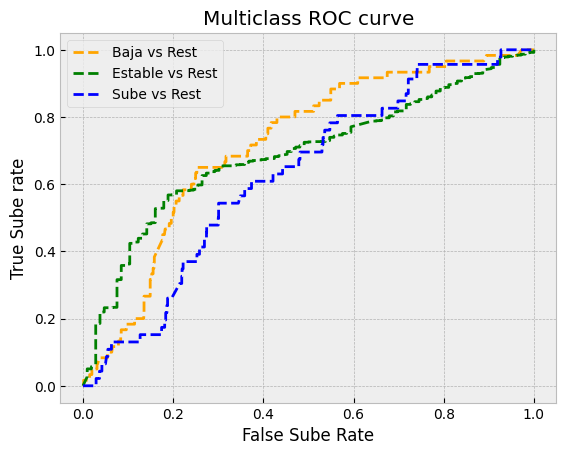

In [5]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb[:, 2], pos_label='Sube')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Alpha = 0.5

In [6]:
clf_mnb_2 = OneVsRestClassifier(MultinomialNB(
    alpha=0.5, fit_prior=True, class_prior=None))
clf_mnb_2.fit(X_train_smt, y_train_smt)
pred_mnb_2 = clf_mnb_2.predict(X_test)
pred_prob_mnb_2 = clf_mnb_2.predict_proba(X_test)

In [7]:
print('Predicted classes:', clf_mnb_2.classes_)
print('Average accuracy :', np.mean(pred_mnb_2 == y_test)*100)
print('Train accuracy :', (clf_mnb_2.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_2.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_2))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_2))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 74.74897731498699
Train accuracy : 90.41873102125619
Test accuracy : 74.74897731498699

 CONFUSION MATRIX
[[  14   36   10]
 [ 301 1989  293]
 [   9   30    7]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.04      0.23      0.07        60
     Estable       0.97      0.77      0.86      2583
        Sube       0.02      0.15      0.04        46

    accuracy                           0.75      2689
   macro avg       0.34      0.39      0.32      2689
weighted avg       0.93      0.75      0.83      2689



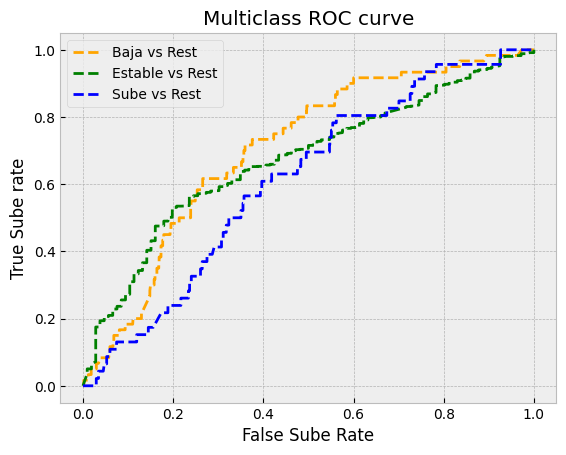

In [8]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_2[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_2[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_2[:, 2], pos_label='Sube')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Alpha = 0.0

In [9]:
clf_mnb_3 = OneVsRestClassifier(MultinomialNB(
    alpha=1.0e-10, fit_prior=True, class_prior=None))
clf_mnb_3.fit(X_train_smt, y_train_smt)
pred_mnb_3 = clf_mnb_3.predict(X_test)
pred_prob_mnb_3 = clf_mnb_3.predict_proba(X_test)

In [10]:
print('Predicted classes:', clf_mnb_3.classes_)
print('Average accuracy :', np.mean(pred_mnb_3 == y_test)*100)
print('Train accuracy :', (clf_mnb_3.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_3.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_3))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_3))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 84.90145035329118
Train accuracy : 93.05178200415534
Test accuracy : 84.90145035329118

 CONFUSION MATRIX
[[  10   45    5]
 [ 171 2270  142]
 [   6   37    3]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.05      0.17      0.08        60
     Estable       0.97      0.88      0.92      2583
        Sube       0.02      0.07      0.03        46

    accuracy                           0.85      2689
   macro avg       0.35      0.37      0.34      2689
weighted avg       0.93      0.85      0.89      2689



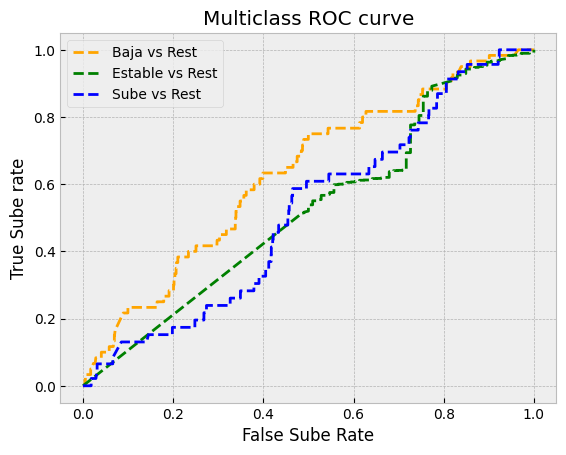

In [11]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_3[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_3[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_3[:, 2], pos_label='Sube')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Alpha = 1.0, fit_prior=False

In [12]:
clf_mnb_4 = OneVsRestClassifier(MultinomialNB(
    alpha=1.0, fit_prior=False, class_prior=None))
clf_mnb_4.fit(X_train_smt, y_train_smt)
pred_mnb_4 = clf_mnb_4.predict(X_test)
pred_prob_mnb_4 = clf_mnb_4.predict_proba(X_test)

In [13]:
print('Predicted classes:', clf_mnb_4.classes_)
print('Average accuracy :', np.mean(pred_mnb_4 == y_test)*100)
print('Train accuracy :', (clf_mnb_4.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_4.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_4))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_4))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 67.64596504276683
Train accuracy : 87.38412977465238
Test accuracy : 67.64596504276683

 CONFUSION MATRIX
[[  16   28   16]
 [ 363 1791  429]
 [  11   23   12]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.04      0.27      0.07        60
     Estable       0.97      0.69      0.81      2583
        Sube       0.03      0.26      0.05        46

    accuracy                           0.68      2689
   macro avg       0.35      0.41      0.31      2689
weighted avg       0.94      0.68      0.78      2689



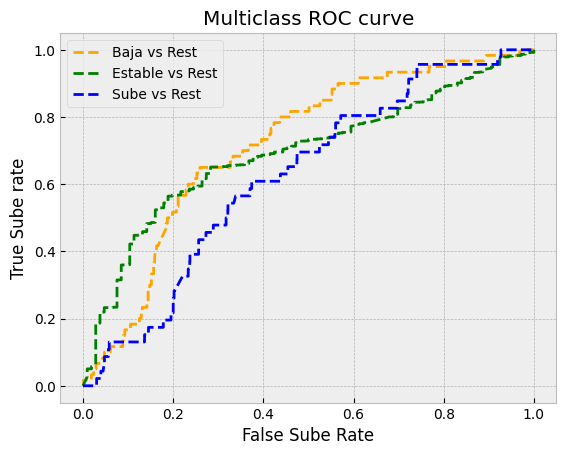

In [14]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_4[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_4[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_4[:, 2], pos_label='Sube')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Alpha = 0.5, fit_prior=False

In [15]:
clf_mnb_5 = OneVsRestClassifier(MultinomialNB(
    alpha=0.5, fit_prior=False, class_prior=None))
clf_mnb_5.fit(X_train_smt, y_train_smt)
pred_mnb_5 = clf_mnb_5.predict(X_test)
pred_prob_mnb_5 = clf_mnb_5.predict_proba(X_test)

In [16]:
print('Predicted classes:', clf_mnb_5.classes_)
print('Average accuracy :', np.mean(pred_mnb_5 == y_test)*100)
print('Train accuracy :', (clf_mnb_5.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_5.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_5))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_5))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 72.5548531052436
Train accuracy : 89.75747163177242
Test accuracy : 72.5548531052436

 CONFUSION MATRIX
[[  13   33   14]
 [ 303 1931  349]
 [  10   29    7]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.04      0.22      0.07        60
     Estable       0.97      0.75      0.84      2583
        Sube       0.02      0.15      0.03        46

    accuracy                           0.73      2689
   macro avg       0.34      0.37      0.31      2689
weighted avg       0.93      0.73      0.81      2689



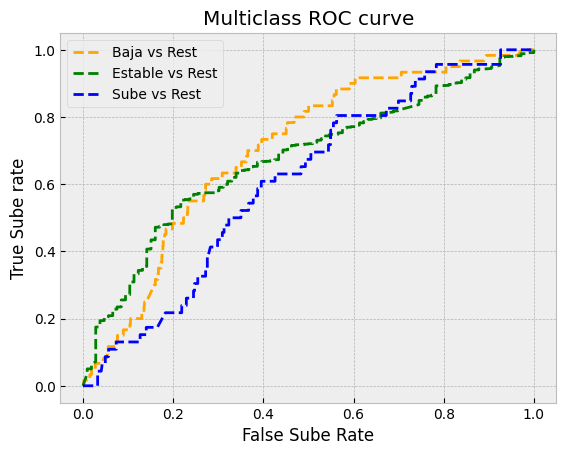

In [17]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_5[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_5[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_5[:, 2], pos_label='Sube')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Alpha = 1.0, fit_prior=True, class_prior=[0.2, 0.96, 0.2]

In [18]:
clf_mnb_6 = (MultinomialNB(alpha=1.0, fit_prior=True,
             class_prior=[0.2, 0.96, 0.2]))
clf_mnb_6.fit(X_train_smt, y_train_smt)
pred_mnb_6 = clf_mnb_6.predict(X_test)
pred_prob_mnb_6 = clf_mnb_6.predict_proba(X_test)

In [19]:
print('Predicted classes:', clf_mnb_6.classes_)
print('Average accuracy :', np.mean(pred_mnb_6 == y_test)*100)
print('Train accuracy :', (clf_mnb_6.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb_6.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_6))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_6))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 78.69096318333953
Train accuracy : 83.93798945181396
Test accuracy : 78.69096318333953

 CONFUSION MATRIX
[[   9   40   11]
 [ 201 2099  283]
 [   7   31    8]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.04      0.15      0.06        60
     Estable       0.97      0.81      0.88      2583
        Sube       0.03      0.17      0.05        46

    accuracy                           0.79      2689
   macro avg       0.35      0.38      0.33      2689
weighted avg       0.93      0.79      0.85      2689



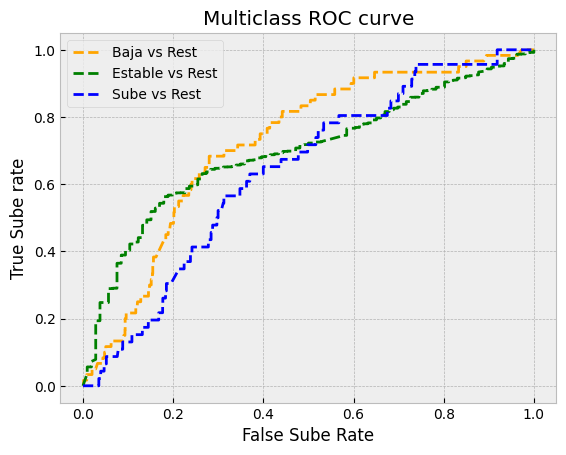

In [20]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_6[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_6[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_6[:, 2], pos_label='Sube')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

## Alpha = 0.5, fit_prior=True, class_prior=[0.2, 0.96, 0.2]

In [21]:
clf_mnb_7 = (MultinomialNB(alpha=0.5, fit_prior=True,
             class_prior=[0.2, 0.96, 0.2]))
clf_mnb_7.fit(X_train_smt, y_train_smt)
pred_mnb_7 = clf_mnb_7.predict(X_test)
pred_prob_mnb_7 = clf_mnb_7.predict_proba(X_test)

In [22]:
print('Predicted classes:', clf_mnb_7.classes_)
print('Average accuracy :', np.mean(pred_mnb_7 == y_test)*100)
print('Train accuracy :', (clf_mnb_7.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb_7))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb_7))

Predicted classes: ['Baja' 'Estable' 'Sube']
Average accuracy : 81.74042394942359
Train accuracy : 85.41034041873102
Test accuracy : 69.80290070658238

 CONFUSION MATRIX
[[   9   41   10]
 [ 167 2183  233]
 [   7   33    6]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Baja       0.05      0.15      0.07        60
     Estable       0.97      0.85      0.90      2583
        Sube       0.02      0.13      0.04        46

    accuracy                           0.82      2689
   macro avg       0.35      0.38      0.34      2689
weighted avg       0.93      0.82      0.87      2689



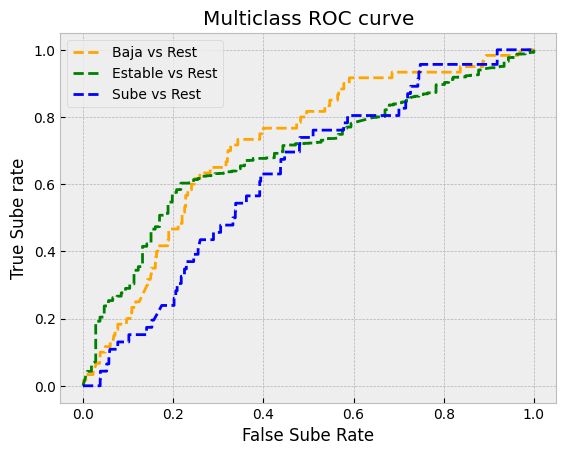

In [23]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb_7[:, 0], pos_label='Baja')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb_7[:, 1], pos_label='Estable')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb_7[:, 2], pos_label='Sube')

plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Baja vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Estable vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Sube vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Sube Rate')
plt.ylabel('True Sube rate')
plt.legend(loc='best')

# Grid earch

In [24]:
param_grid_mnb = {'alpha': [1, 0.1, 0.01, 0.001]}
grid_mnb = GridSearchCV(MultinomialNB(fit_prior=True,
                                      class_prior=[0.2, 0.96, 0.2]), param_grid_mnb)
grid_mnb.fit(X_train_smt, y_train_smt)
print("Mejor modelo predicho: " + str(grid_mnb.best_estimator_))

Mejor modelo predicho: MultinomialNB(alpha=0.001, class_prior=[0.2, 0.96, 0.2])


In [28]:
param_grid_mnb = {'alpha': [1, 0.1, 0.01, 0.001]}
grid_mnb = GridSearchCV(MultinomialNB(fit_prior=True,
                                      class_prior=None), param_grid_mnb)
grid_mnb.fit(X_train_smt, y_train_smt)
print("Mejor modelo predicho: " + str(grid_mnb.best_estimator_))

Mejor modelo predicho: MultinomialNB(alpha=0.001)
